# Neural Network for Prediction using TensorFlow 2.0 (Objected-Oriented)
## CPE 490 590 
### Author: Rahul Bhadani

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
import datetime


2024-03-04 22:13:22.378783: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-04 22:13:22.386073: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-04 22:13:22.472301: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 22:13:22.472353: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 22:13:22.474750: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Read the data

In [7]:
df = pd.read_csv('Dataset/Advertising/Advertising.csv', index_col = 0)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


Here, response variable is `Sales` that we want to predict based on sales of `TV`, `Radio`, `Newspaper`.

In [18]:
y = df[['Sales']]  # Response Variable
x = df.drop('Sales', axis=1) # Feature Matrix


## Split the Dataset into Training and Testing

In [9]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 1/3, random_state = 0)


# Model Class for Neural Network

In [10]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class NeuralNetwork(Model):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = Dense(4, activation='relu')
        self.layer2 = Dense(2, activation='relu')
        self.layer3 = Dense(3, activation='relu')
        self.output_layer = Dense(1)

    def call(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return self.output_layer(x)

neuralnet_model = NeuralNetwork()

2024-03-04 22:14:40.709545: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


# Training

In [11]:
neuralnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

history = neuralnet_model.fit(X_Train, Y_Train, epochs=1000, validation_data=(X_Test, Y_Test), 
                    verbose=1, callbacks=[tensorboard_callback])


Epoch 1/1000
5/5 [==============================] - 2s 113ms/step - loss: 325.1198 - val_loss: 641.1539
Epoch 2/1000
5/5 [==============================] - 0s 25ms/step - loss: 311.1218 - val_loss: 602.9796
Epoch 3/1000
5/5 [==============================] - 0s 33ms/step - loss: 297.1518 - val_loss: 569.7262
Epoch 4/1000
5/5 [==============================] - 0s 19ms/step - loss: 286.6675 - val_loss: 537.1312
Epoch 5/1000
5/5 [==============================] - 0s 24ms/step - loss: 276.4860 - val_loss: 507.8944
Epoch 6/1000
5/5 [==============================] - 0s 19ms/step - loss: 265.5916 - val_loss: 483.2943
Epoch 7/1000
5/5 [==============================] - 0s 17ms/step - loss: 255.9152 - val_loss: 460.6536
Epoch 8/1000
5/5 [==============================] - 0s 26ms/step - loss: 245.2867 - val_loss: 436.5101
Epoch 9/1000
5/5 [==============================] - 0s 29ms/step - loss: 230.4306 - val_loss: 411.5289
Epoch 10/1000
5/5 [==============================] - 0s 22ms/step - loss

# Plot training & validation loss values


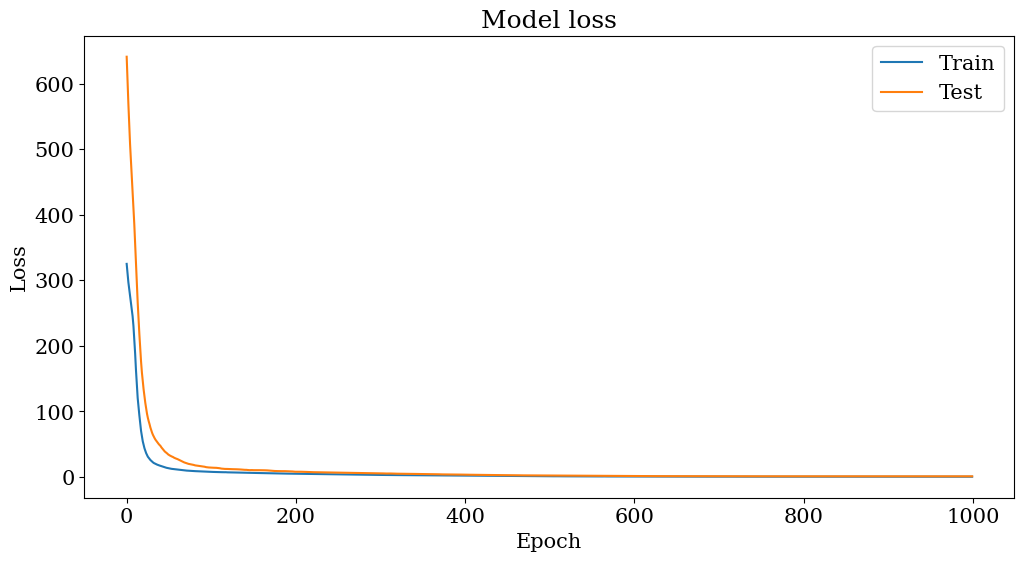

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Mean Squared Error on the Test Data

In [13]:
test_loss = neuralnet_model.evaluate(X_Test, Y_Test, verbose=1)

print(f"Mean Squared Error on Test Data: {test_loss}")

3/3 [==============================] - 0s 2ms/step - loss: 1.0062
Mean Squared Error on Test Data: 1.0062353610992432


# Save The Final Model Weights

In [14]:
neuralnet_model.save_weights('model_weights.h5')

# Local The Final Model Weights from Saved `.h5` File

In [15]:
# Create a new instance of the same model
new_model = NeuralNetwork()

# Call the model on some data (this could be a batch of your actual data or dummy data)
dummy_data = tf.zeros((1, 3))  # Assuming the input shape is (None, 3)
new_model(dummy_data)

# Load the previously saved weights
new_model.load_weights('model_weights.h5')

# Save the entire model to the TensorFlow SavedModel format


In [16]:
neuralnet_model.save('mymodel', save_format='tf')


INFO:tensorflow:Assets written to: mymodel/assets


INFO:tensorflow:Assets written to: mymodel/assets


# Load the entire model from the TensorFlow SavedModel format


In [17]:
loaded_model = tf.keras.models.load_model('mymodel')
